In [1]:
from calibration_metric.vis.calibration_plot import plot_df, get_df_from_file

calflow_paths_and_models = [("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-small-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-base-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-large-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits", 
                             "T5-large"),
                            ("/brtx/604-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/bart-base_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/bart-large_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-large")]

tree_dst_paths_and_models = [("/brtx/605-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-small-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-base-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-large-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-large"),
                            ("/brtx/604-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/bart-base_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/605-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/bart-large_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-large")]

all_dfs = {"calflow": {}, "tree_dst": {}}

print("get calflow dfs")
for path, name in calflow_paths_and_models:
    all_dfs['calflow'][name] = get_df_from_file(path)
print("get tree_dst dfs")
for path, name in tree_dst_paths_and_models:
    all_dfs['tree_dst'][name] = get_df_from_file(path)


# df_to_plot = get_df_from_file(path_to_file, n_bins=20)
# fig = plot_df(df_to_plot)

get calflow dfs
get tree_dst dfs


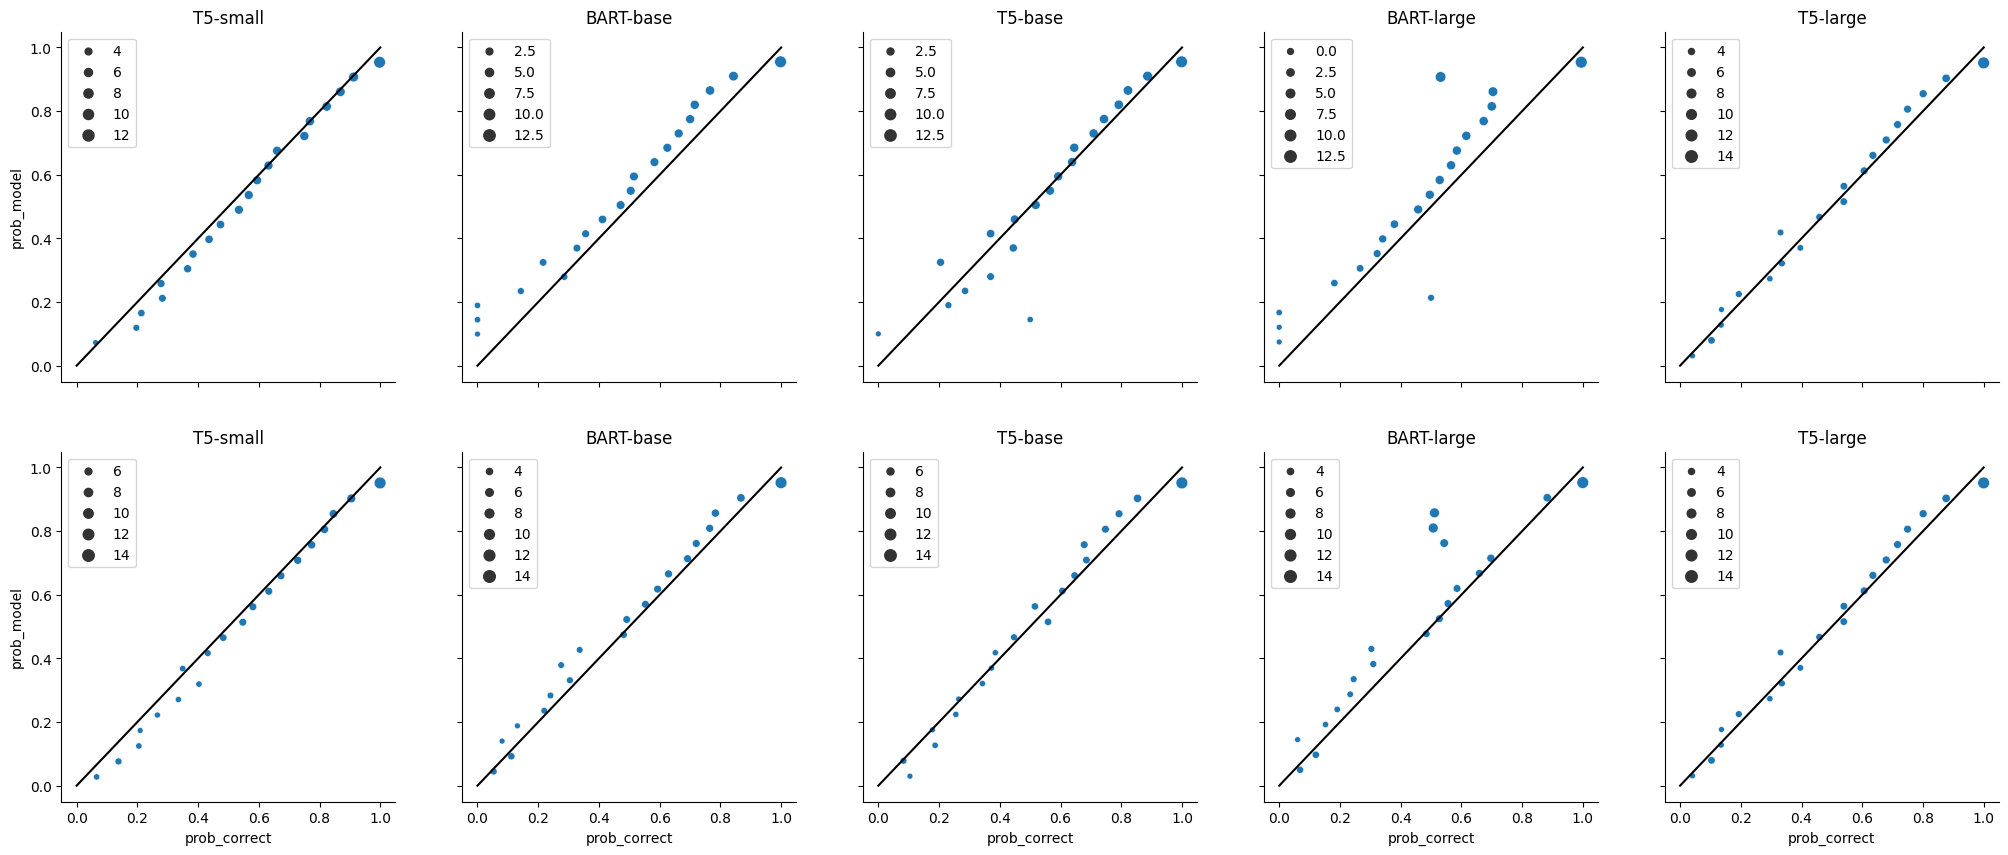

In [6]:
from matplotlib import pyplot as plt 
import sys 
sys.path.insert(0, "/home/estengel/calibration_metric/calibration_metric")
from vis.calibration_plot import plot_df, get_df_from_file

fig, axes = plt.subplots(2, 5, figsize=(25, 10), sharex=True, sharey=True)


order = ["T5-small",  "BART-base", "T5-base", "BART-large", "T5-large" ]

for i, model in enumerate(order):
    cf_df_to_plot = all_dfs['calflow'][model]
    plot_df(cf_df_to_plot, ax=axes[0, i], title=model)
    td_df_to_plot = all_dfs['tree_dst'][model]
    plot_df(td_df_to_plot, ax=axes[1, i], title=model)



Number of examples: 91723
correct_sum: 89865
[0.16666667 0.         0.1        0.34615385 0.26923077 0.42553191
 0.40740741 0.47222222 0.48235294 0.52662722 0.53370787 0.55921053
 0.62702703 0.65048544 0.68253968 0.70032573 0.75197889 0.78328173
 0.83950617 0.99286367]
[0.18927671 0.22981277 0.27034882 0.31088488 0.35142094 0.391957
 0.43249305 0.47302911 0.51356517 0.55410122 0.59463728 0.63517334
 0.6757094  0.71624545 0.75678151 0.79731757 0.83785363 0.87838968
 0.91892574 0.9594618  0.99999785]


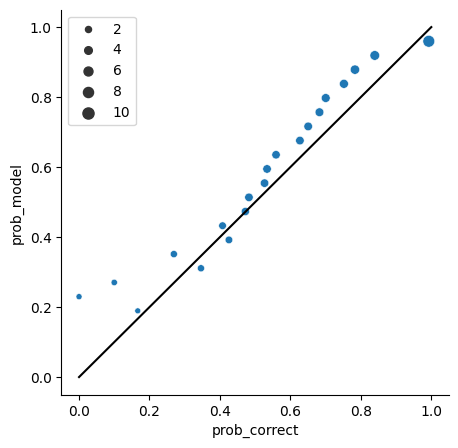

In [17]:
import importlib
import calibration_metric
from calibration_metric.vis.calibration_plot import plot_df, get_df_from_file
from calibration_metric.utils.reader import MisoTopLogitFormatSequenceReader
importlib.reload(calibration_metric)
df = get_df_from_file("/brtx/603-nvme1/estengel/calflow_calibration/tune_roberta_number_tokenize/translate_output/dev_valid.logits",
                     n_bins=20,
                     reader_cls=MisoTopLogitFormatSequenceReader,
                     ignore_tokens=["@ROOT@"])

# print(df[])
                    #  ignore_tokens=["@ROOT@", "@end@"])
plot_df(df)